https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ


http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

In [1]:
import torchvision

In [5]:
!mkdir celeba

In [4]:
! cp '/content/drive/MyDrive/data/img_align_celeba.zip' ./celeba

In [5]:
!unzip -j '/content/drive/MyDrive/data/Anno-20240318T110035Z-001.zip' -d celeba

Archive:  /content/drive/MyDrive/data/Anno-20240318T110035Z-001.zip
  inflating: celeba/list_bbox_celeba.txt  
  inflating: celeba/identity_CelebA.txt  
  inflating: celeba/list_landmarks_celeba.txt  
  inflating: celeba/list_landmarks_align_celeba.txt  
  inflating: celeba/list_attr_celeba.txt  


In [6]:
!cp /content/drive/MyDrive/data/list_eval_partition.txt celeba

In [7]:
from glob import glob

In [8]:
glob('/content/celeba/*')

['/content/celeba/list_attr_celeba.txt',
 '/content/celeba/identity_CelebA.txt',
 '/content/celeba/list_bbox_celeba.txt',
 '/content/celeba/list_landmarks_align_celeba.txt',
 '/content/celeba/list_landmarks_celeba.txt',
 '/content/celeba/img_align_celeba.zip',
 '/content/celeba/list_eval_partition.txt']

In [ ]:
!unzip '/content/celeba/img_align_celeba.zip' -d celeba

In [ ]:
glob("celeba/img_align_celeba/*.jpg")

In [34]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path,split='train',target_type='attr',download=True)

Files already downloaded and verified


In [30]:
import torch

In [31]:
isinstance(celeba_dataset, torch.utils.data.Dataset)

True

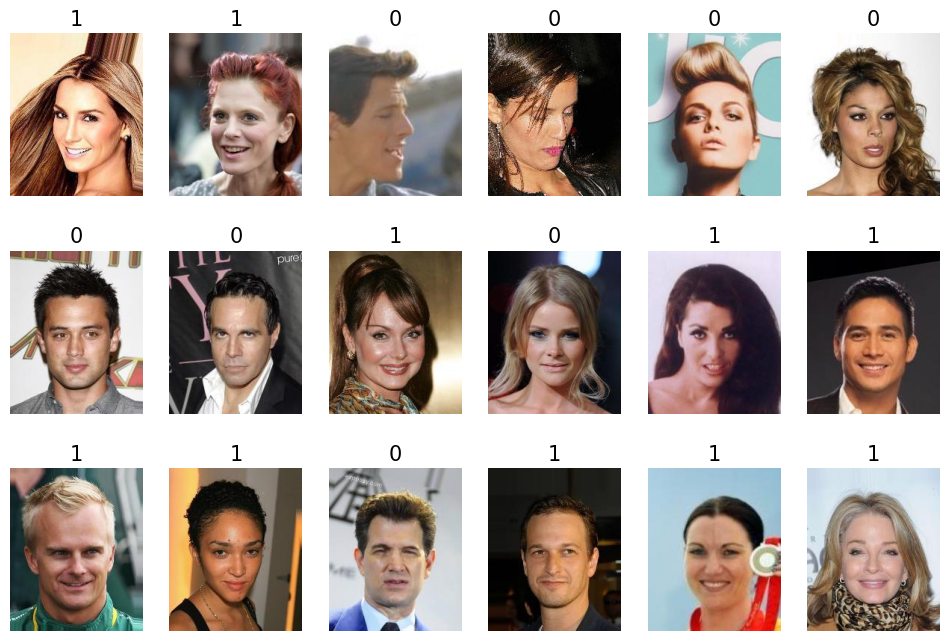

In [32]:
import matplotlib.pyplot as plt
from itertools import islice
fig = plt.figure(figsize=(12,8))
for i, (image,attributes) in islice(enumerate(celeba_dataset),18):  # 처음부터 18개를 가져와라
  ax = fig.add_subplot(3,6,i+1)
  ax.set_axis_off()
  ax.imshow(image)
  ax.set_title(f"{attributes[31]}", size=15)  # 성별 속성 0은 남성 1은 여성
plt.show()

In [22]:
mnist_dataset =  torchvision.datasets.MNIST(image_path,'train',download=True)
assert isinstance(mnist_dataset,torch.utils.data.Dataset)

100%|██████████| 9912422/9912422 [00:00<00:00, 114001006.99it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71890619.48it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33786157.99it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13636742.14it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



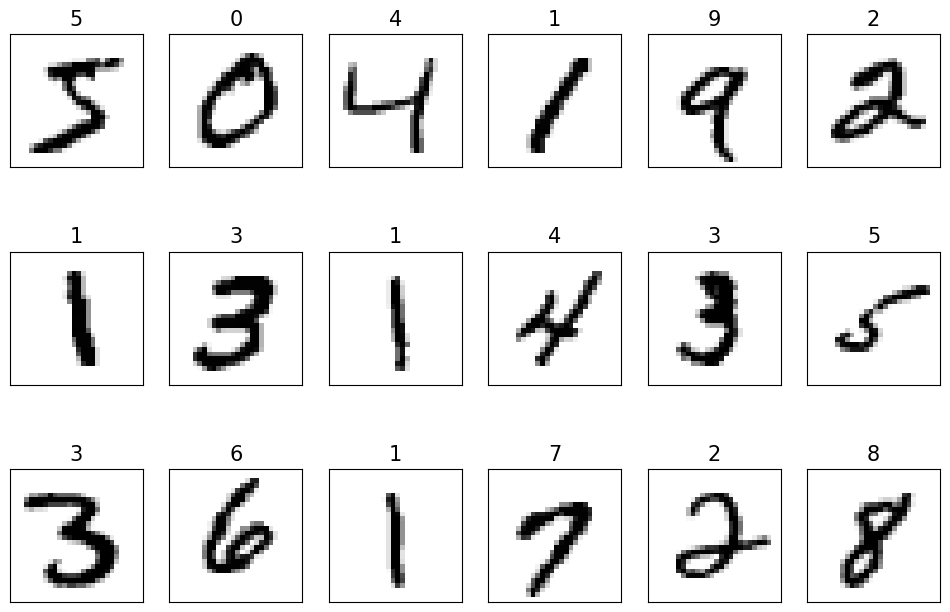

In [26]:
fig = plt.figure(figsize=(12,8))
for i, (image,label) in islice(enumerate(mnist_dataset),18):  # 처음부터 18개를 가져와라
  ax = fig.add_subplot(3,6,i+1)
  # ax.set_axis_off()
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image,cmap='gray_r')
  ax.set_title(f"{label}", size=15)  # 성별 속성 0은 남성 1은 여성
plt.show()

파이토치로 신경망모델 만들기

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt


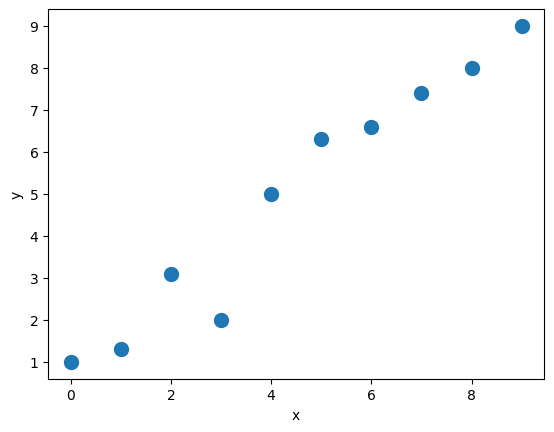

In [30]:
X_train = np.arange(10, dtype='float32').reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],
                     dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()  #그레이디언트(기울기)를 자동으로 계산하는데 사용
bias = torch.zeros(train_ds,batch_size,shuffle=True)
